In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
processed_data = pd.read_csv("C:/Users/HP/OneDrive/Documents/DANNY DATA/Customer Support Data/Processed_customer_support_data.csv")
processed_data.head()

,channel_name,category,sub-category,issue_reported_at,issue_responded,response_time_(hours),response_time_(minutes),response_time_(seconds),time_of_issue,time_of_response,report_day_name,report_month_day,response_month_day,response_day_name,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score
0,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,0.566667,34.0,2040.0,11:13,11:47,Tuesday,1,1,Tuesday,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,0.033333,2.0,120.0,12:52,12:54,Tuesday,1,1,Tuesday,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,0.366667,22.0,1320.0,20:16,20:38,Tuesday,1,1,Tuesday,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,0.333333,20.0,1200.0,20:56,21:16,Tuesday,1,1,Tuesday,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,0.033333,2.0,120.0,10:30,10:32,Tuesday,1,1,Tuesday,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [14]:
processed_data["tenure_bucket"].unique()

array(['On Job Training', '>90', '0-30', '31-60', '61-90'], dtype=object)

In [161]:
processed_data.columns

Index(['channel_name', 'category', 'sub-category', 'issue_reported_at',
       'issue_responded', 'response_time_(hours)', 'response_time_(minutes)',
       'response_time_(seconds)', 'time_of_issue', 'time_of_response',
       'report_day_name', 'report_month_day', 'response_month_day',
       'response_day_name', 'agent_name', 'supervisor', 'manager',
       'tenure_bucket', 'agent_shift', 'csat_score'],
      dtype='object')

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_barplot(data, x_col, y_col, title="", xlabel="", ylabel="", hue=None, figsize=(12, 6), palette="viridis", show_values = True):
    """
    Creates a consistent Seaborn bar plot.
    
    Parameters:
    - data: DataFrame to use for the plot
    - x_col: Column for the x-axis
    - y_col: Column for the y-axis
    - title: Title of the plot (default: "")
    - xlabel: Label for the x-axis (default: "")
    - ylabel: Label for the y-axis (default: "")
    - hue: Column for color encoding (default: None)
    - figsize: Tuple specifying figure size (default: (10, 6))
    - palette: Color palette to use (default: "viridis")
    
    Returns:
    - Displays the plot.
    """
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=data, x=x_col, y=y_col, hue=hue, palette=palette, ci=None, width=0.5)

    
    plt.title(title, fontsize=14)

    # automatically create x and y axis labels except otherwise types
    plt.xlabel(xlabel if xlabel else 
               f"{x_col}".replace("_", " ").title(), fontsize=12)
    
    plt.ylabel(ylabel if ylabel else 
               f"{y_col}".replace("_", " ").title(), fontsize=12)


    plt.xticks(rotation=45)
    plt.tight_layout()
    
    
    if show_values:
        for p in ax.patches:
            value = f"{p.get_height():.2f}"  # Format the height value
            ax.annotate(value, 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black')

    plt.show()


### Average CSAT Score BY Channel Name (barplot)

C:\Users\HP\AppData\Local\Temp\ipykernel_25200\3832492136.py:23: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




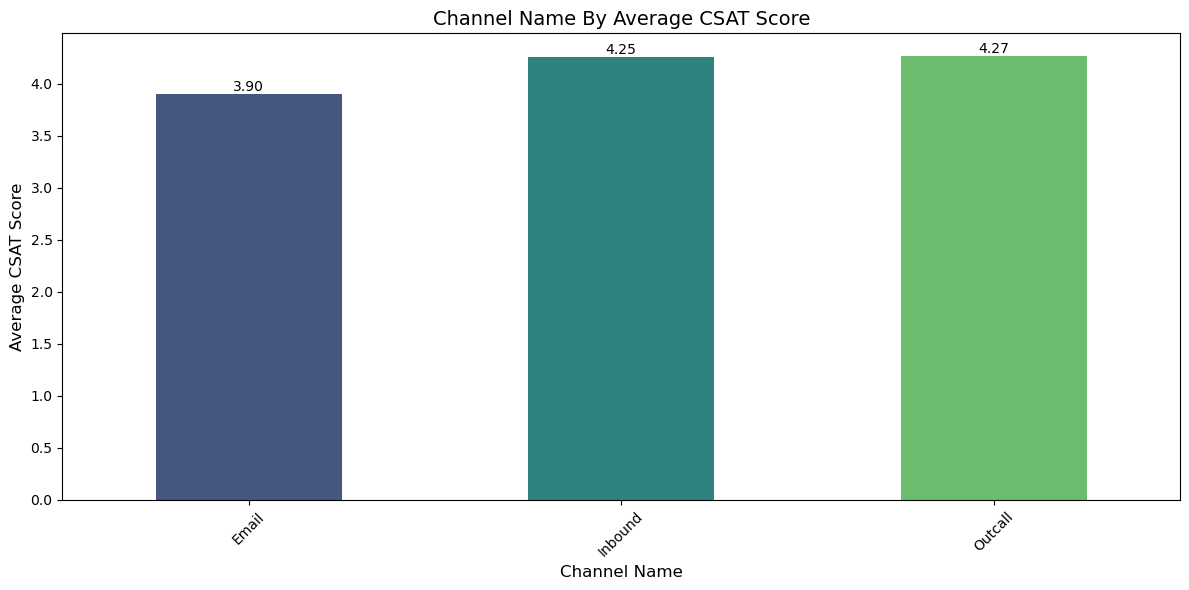

In [163]:
channel_name_by_avg_csat_score = processed_data.groupby("channel_name")["csat_score"].mean().reset_index()

create_barplot(
    data = channel_name_by_avg_csat_score,
    x_col = "channel_name",
    y_col = "csat_score",
    title="Channel Name By Average CSAT Score",
    ylabel="Average CSAT Score"
     
)

C:\Users\HP\AppData\Local\Temp\ipykernel_25200\3832492136.py:23: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




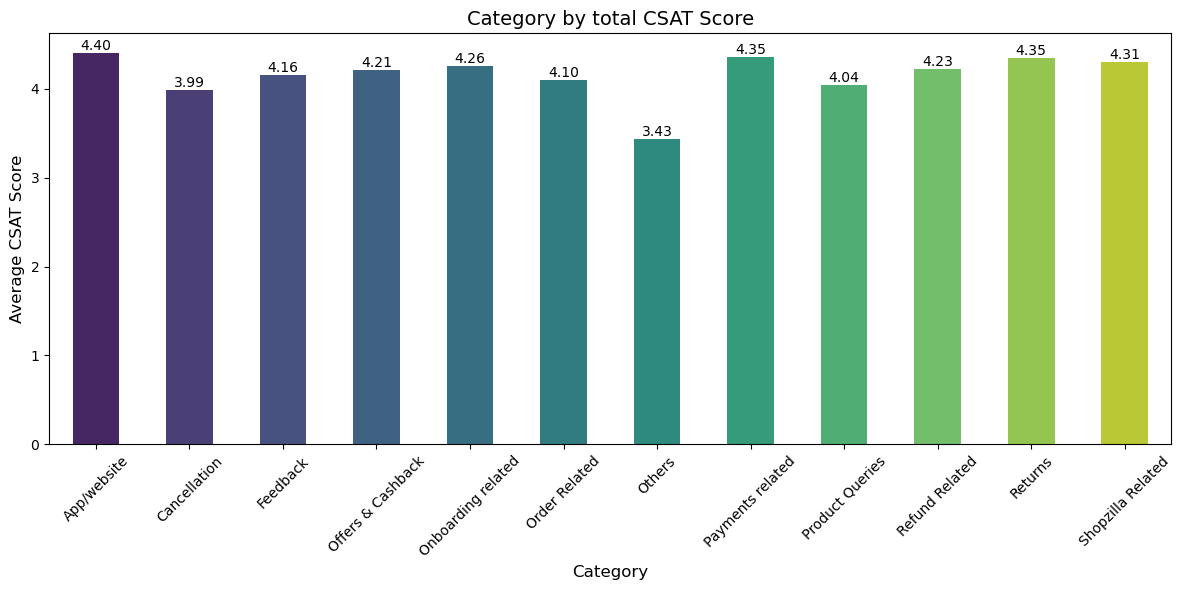

In [164]:
category_by_avg_csat_score = processed_data.groupby("category")["csat_score"].mean().reset_index()

create_barplot(
    category_by_avg_csat_score,
    x_col="category",
    y_col="csat_score",
    title="Category by total CSAT Score",
    ylabel="Average CSAT Score"
)


In [165]:
# all subcategories and their average CSAT scores in ascending order
sub_cat_csat_score = processed_data.groupby("sub-category")["csat_score"].mean().sort_values(ascending=True).reset_index()
sub_cat_csat_score

,sub-category,csat_score
0,Commission related,2.333333
1,Unable to Login,2.428571
2,Service Center - Service Denial,3.224138
3,Call disconnected,3.225000
4,Technician Visit,3.489418
5,Call back request,3.521739
6,Seller Cancelled Order,3.584514
7,Other Account Related Issues,3.636364
8,Others,3.666667
9,Warranty related,3.782051


In [166]:
processed_data.columns

Index(['channel_name', 'category', 'sub-category', 'issue_reported_at',
       'issue_responded', 'response_time_(hours)', 'response_time_(minutes)',
       'response_time_(seconds)', 'time_of_issue', 'time_of_response',
       'report_day_name', 'report_month_day', 'response_month_day',
       'response_day_name', 'agent_name', 'supervisor', 'manager',
       'tenure_bucket', 'agent_shift', 'csat_score'],
      dtype='object')

In [167]:
time_of_issue = processed_data["time_of_issue"].value_counts().sort_index()

In [168]:

import plotly.express as px

time_of_issue = pd.to_datetime(processed_data['time_of_issue']).dt.hour
time_of_response = pd.to_datetime(processed_data['time_of_response']).dt.hour

# issues reported for each hour
issue_counts = time_of_issue.value_counts().sort_index().reset_index()
issue_counts.columns = ['Hour', 'Issue Count']

# responses for each hour
response_counts = time_of_response.value_counts().sort_index().reset_index()
response_counts.columns = ['Hour', 'Response Count']

# Merge the two datasets for comparison
comparison_df = pd.merge(
    issue_counts,
    response_counts,
    on='Hour',
    how='outer'
).fillna(0)  


comparison_df['Hour'] = comparison_df['Hour'].astype(int).astype(str) + ":00"

melted_df = comparison_df.melt(id_vars='Hour', var_name='Type', value_name='Count')

# line chart
fig = px.line(
    melted_df,
    x='Hour',
    y='Count',
    color='Type',
    text='Count',
    title='Number of Issues Reported vs. Responses Per Hour',
    labels={'Hour': 'Hour of the Day', 'Count': 'Number of Entries', 'Type': 'Category'},
    template='plotly'
)

fig.update_layout(
    xaxis=dict(dtick=1),  # Ensure ticks are at every hour
    yaxis=dict(showgrid=True),
   
)

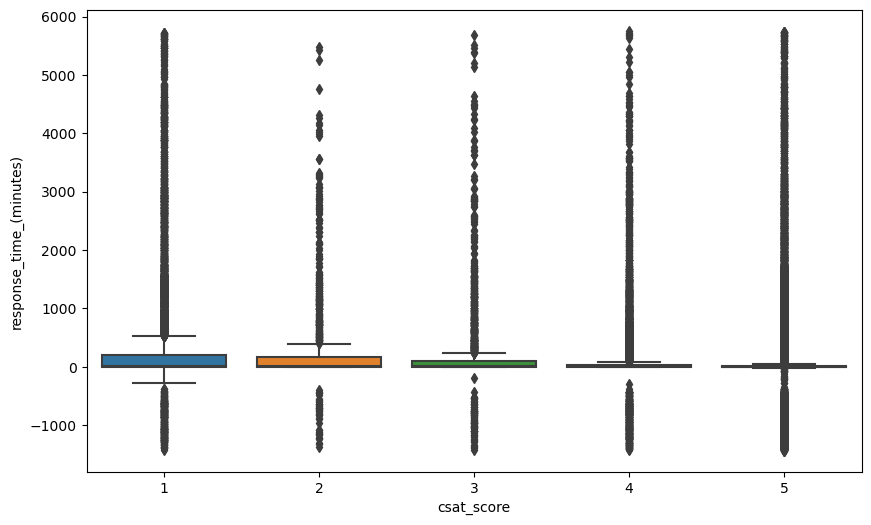

In [169]:
plt.figure(figsize=(10, 6))
sns.boxplot(processed_data, x="csat_score", y="response_time_(minutes)")

# plt.yl
plt.show()

__The box plot above shows us that customers with a CSAT score of 5 experience the smallest response times out of all while those with a CSAT score of 1 experirnce longer response times__

In [170]:
speed_of_issue = pd.to_datetime(processed_data['time_of_issue']).dt.minute
speed_of_response = pd.to_datetime(processed_data['time_of_response']).dt.minute

response_speed = list(zip(speed_of_issue, speed_of_response))
speed_df = pd.DataFrame(
    {"resp1" : [i[0] for i in response_speed],
     
    "resp2" : [i[1] for i in response_speed]
    }
)

speed_df

,resp1,resp2
0,13,47
1,52,54
2,16,38
3,56,16
4,30,32
...,...,...
85902,20,22
85903,15,17
85904,57,2
85905,59,0


In [171]:

processed_data[["time_of_issue", "time_of_response", "response_time_(minutes)"]].sort_values(ascending=False, by="response_time_(minutes)")

,time_of_issue,time_of_response,response_time_(minutes)
23525,22:06,22:04,5758.0
5597,11:32,11:14,5742.0
30734,16:58,16:35,5737.0
41735,17:40,17:14,5734.0
27587,18:31,18:00,5729.0
...,...,...,...
77299,23:48,00:00,-1428.0
75665,23:53,00:00,-1433.0
75053,23:55,00:00,-1435.0
74420,23:56,00:00,-1436.0


In [17]:
processed_data.to_csv("C:/Users/HP/OneDrive/Documents/DANNY DATA/Customer Support Data/model_data.csv", index=False)